![Сбор данных](https://ptzgovorit.ru/sites/default/files/original_nodes/banka_tasima_7.jpg)

# Содержание

- [1. Библиотеки](#1.-Импорт-библиотек-и-загрузка-данных-для-моделирования)
- [2. Моделирования ARIMA](#2.-Моделирования-ARIMA)
- [3. Моделирование алгоритмами ML](#3.-Моделирование-алгоритмами-ML)
- [4. Моделирование алгоритмами ML с сэмплами](#4.-Моделирование-алгоритмами-ML-с-сэмплами)
- [5. Моделирование алгоритмами ML с выделением признаков из сэмплов](#5.-Моделирование-алгоритмами-ML-с-выделением-признаков-из-сэмплов)

# 1. Импорт библиотек и загрузка данных для моделирования

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import random

import datetime, calendar
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

#Загружаем необходимые нам библиотеки
#библиотеки для моделирования
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso


import pdb

In [2]:
import import_ipynb
import sberlib
from sberlib import OptimizedARIMA, ARIMA

importing Jupyter notebook from sberlib.ipynb


In [3]:
data = pd.read_csv('C:/Users/Алексей Третьяков/Desktop/ML_projects/FierceDra-X.github.io/Sber/data_resampled.csv', sep = ';')
sb = pd.read_csv('C:/Users/Алексей Третьяков/Desktop/ML_projects/FierceDra-X.github.io/Sber/data_notsampled.csv', sep = ';')

In [4]:
sb['date'] = pd.to_datetime(sb['date'], format = '%Y-%m-%d')

In [6]:
data, sb

(          date    value    value_filt      res
 0   2013-12-31   3417.1   3451.526706    -40.5
 1   2014-01-31   3282.8   3399.004007    916.5
 2   2014-02-28   3885.9   3875.036610    677.1
 3   2014-03-31   4699.4   4740.814001   1239.5
 4   2014-04-30   4270.6   3544.483327  10578.3
 ..         ...      ...           ...      ...
 66  2019-06-30  61914.9  62341.010574   2115.0
 67  2019-07-31  62498.2  62343.468930   -732.6
 68  2019-08-31  59314.6  59449.450436  -2139.1
 69  2019-09-30  58806.3  59834.636322    159.2
 70  2019-10-31  61596.1  61451.675523  10990.5
 
 [71 rows x 4 columns],
            date    value     res    value_filt
 0    2013-12-30   3457.6     NaN   3457.612614
 1    2013-12-31   3417.1   -40.5   3451.526706
 2    2014-01-01   3417.1     0.0   3446.605409
 3    2014-01-02   3417.1     0.0   3443.885054
 4    2014-01-03   3417.1     0.0   3444.156062
 ...         ...      ...     ...           ...
 2106 2019-10-06  64630.1     0.0  66844.954790
 2107 2019-10-

# 2. Моделирования ARIMA

Среднемесячное отклонение от фактических остатков: 5.0 %
Максимум пробития млн. руб.: 7152.8
Оптимальная средняя скорость роста остатков: 1367.3 млн. руб./мес.
Оптимальное стандартное отклонение остатков: 979.7 млн. руб.


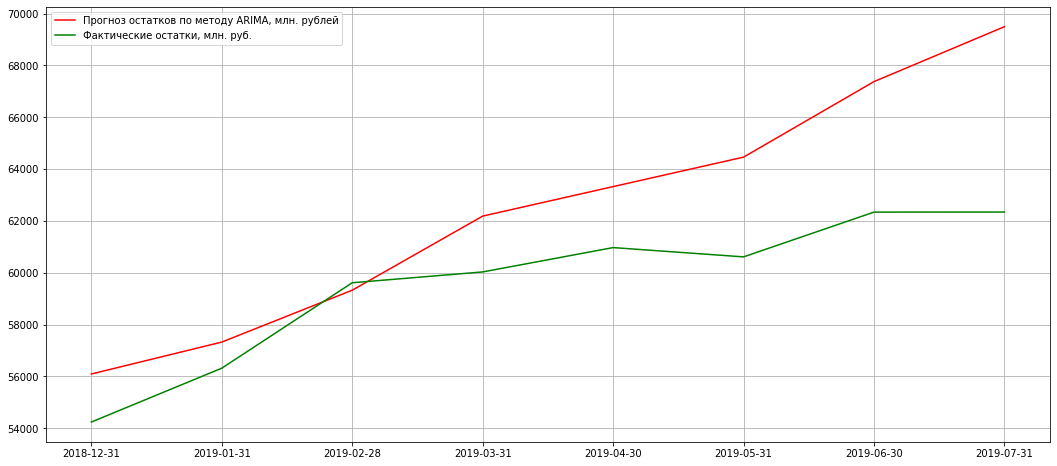

In [6]:
Sber_forecast = OptimizedARIMA(start_date='2018-12-31', month_number=8, data=data)
Sber_forecast.forecast_plot()

In [17]:
start_date = '2016-11-30'
finish_date = '2018-01-31'

for date in data[(data.date >= start_date) &
                 (data.date <= finish_date)].date.values:
    Sber_forecast_cycle = OptimizedARIMA(start_date=str(date)[:10], month_number=10, data=data)
    print(str(date)[:10])
    Sber_forecast_cycle.forecast_errors()

2016-11-30
Среднемесячное отклонение от фактических остатков: 4.7 %
Максимум пробития млн. руб.: 845.4
2016-12-31
Среднемесячное отклонение от фактических остатков: 3.4 %
Максимум пробития млн. руб.: 1787.9
2017-01-31
Среднемесячное отклонение от фактических остатков: 6.1 %
Максимум пробития млн. руб.: 5767.2
2017-02-28
Среднемесячное отклонение от фактических остатков: 5.6 %
Максимум пробития млн. руб.: 4829.7
2017-03-31
Среднемесячное отклонение от фактических остатков: 5.1 %
Максимум пробития млн. руб.: 3203.4
2017-04-30
Среднемесячное отклонение от фактических остатков: 6.5 %
Максимум пробития млн. руб.: 873.6
2017-05-31
Среднемесячное отклонение от фактических остатков: 4.1 %
Максимум пробития млн. руб.: 2130.3
2017-06-30
Среднемесячное отклонение от фактических остатков: 7.7 %
Максимум пробития млн. руб.: 5611.9
2017-07-31
Среднемесячное отклонение от фактических остатков: 18.1 %
Максимум пробития млн. руб.: 12267.8
2017-08-31
Среднемесячное отклонение от фактических остатков: 11

# 3. Моделирование алгоритмами ML

Среднемесячное отклонение от фактических остатков: 16.28 %
Максимум пробития млн. руб.: 0.0 млн. руб.


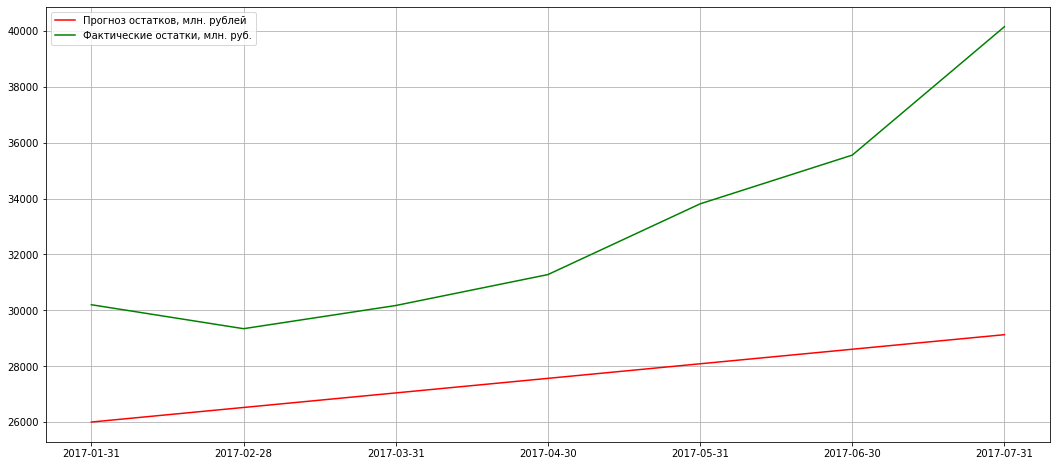

In [13]:
%run sberlib.ipynb 
ML_forecast(start_date='2017-01-31', forecast_date='2017-08-31', data=data, model=LinearRegression())

# 4. Моделирование алгоритмами ML с сэмплами

Оптимальный размер сэмпла: 39
Среднемесячное отклонение от фактических остатков: 4.86 %
Максимум пробития млн. руб.: 7562.0 млн. руб.


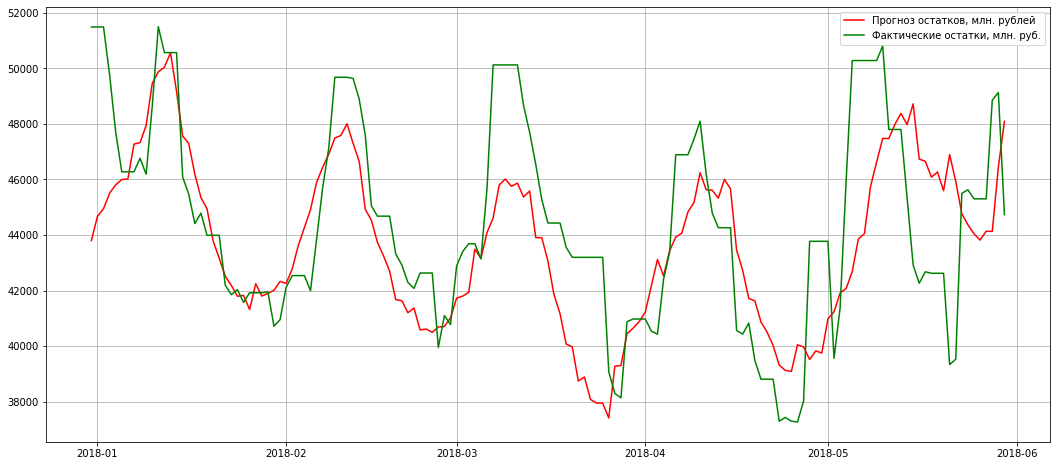

In [131]:
ML_forecast_optimized_samples(start_date='2017-12-31', forecast_date='2018-05-31',
                    data=sb,
                    model=LinearRegression(),
                    max_sample_size =360)

Оптимальный размер сэмпла: 35
Среднемесячное отклонение от фактических остатков: 6.78 %
Максимум пробития млн. руб.: 0.0 млн. руб.


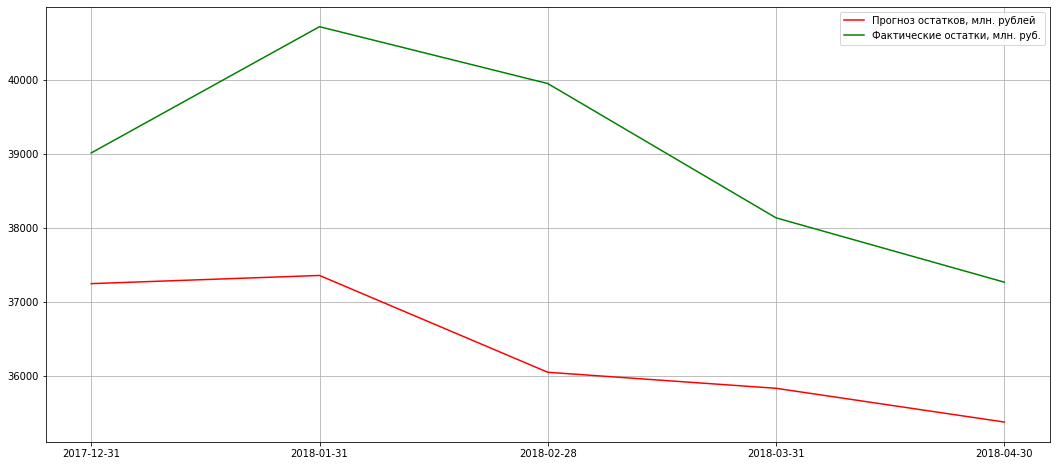

In [133]:
ML_forecast_optimized_samples(start_date='2017-12-31', forecast_date='2018-05-31',
                              data=data,
                              model=LinearRegression(),
                              max_sample_size =35)

# 5. Моделирование алгоритмами ML с выделением признаков из сэмплов

Оптимальный размер сэмпла: 42
Среднемесячное отклонение от фактических остатков: 6.61 %
Максимум пробития млн. руб.: 5032.0 млн. руб.


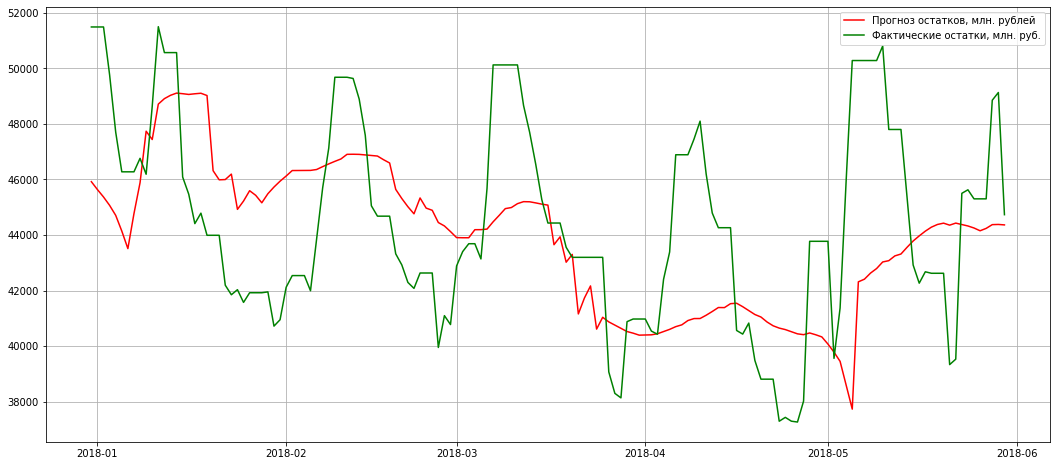

In [129]:
%run sberlib.ipynb
ML_forecast_optimized_features(start_date='2017-12-31', forecast_date='2018-05-31',
                    data=sb,
                    model=LinearRegression(),
                    min_sample_size=5,
                    max_sample_size =365)

Оптимальный размер сэмпла: 19
Среднемесячное отклонение от фактических остатков: 8.14 %
Максимум пробития млн. руб.: 0.0 млн. руб.


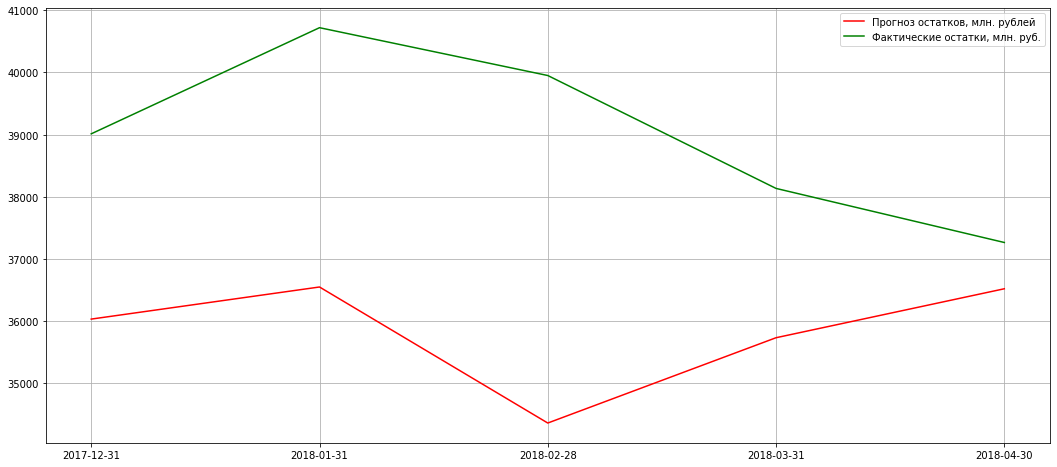

In [128]:
%run sberlib.ipynb
ML_forecast_optimized_features(start_date='2017-12-31', forecast_date='2018-05-31',
                    data=data,
                    model=LinearRegression(),
                    min_sample_size = 5,
                    max_sample_size =35)